### Load data

Load needed packages.

In [1]:
%matplotlib inline
import pandas as pd
import collections
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from tabulate import tabulate

Read in tweetdata created by the cleaning script.

In [2]:
df = pd.DataFrame.from_csv('tweetdata', header = 0, sep='~,~', index_col=None).dropna()
df['date']=pd.to_datetime(df['date'])

/Users/nbrawand/anaconda/lib/python3.5/site-packages/pandas/core/frame.py:1189: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  infer_datetime_format=infer_datetime_format)


Convert GMT times to EST (-4 hours)

In [12]:
df['date']=df['date']-pd.Timedelta('4 hours')

Create a graph of the number of tweets by day and hour.

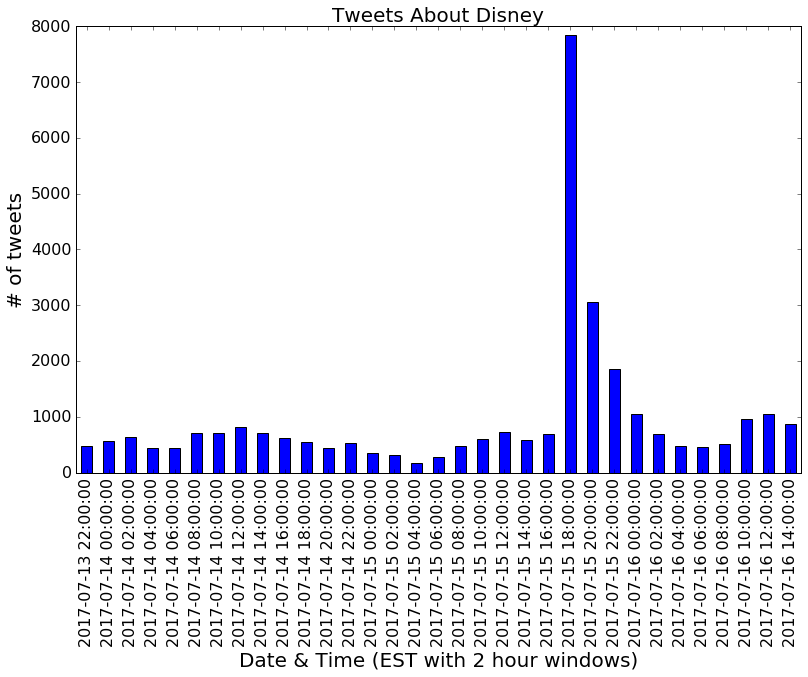

In [18]:
df2 = df
df2.set_index('date', drop=False, inplace=True)
plot = df2['date'].groupby(pd.TimeGrouper(freq='120Min')).count().plot(kind="bar",figsize=(13,8),fontsize=16)
plot.set_xlabel('Date & Time (EST with 2 hour windows)', fontsize=20)
plot.set_ylabel('# of tweets', fontsize=20)
plot.set_title('Tweets About Disney', fontsize=20)

calculate the most common noun phrases from 18:00 15th to 00:00 16th 

In [26]:
df2 = df[df['date']>'2017-07-15  18:00:00']
df2 = df2[df2['date']<'2017-07-16  00:00:00']

# create set of words in tweets
wordlist = []
for i in df2.tweet.values:
    blob = TextBlob(i.replace('…',''))
    wordlist += blob.noun_phrases
    #wordlist += i.replace(':','').split()
# count words
collection = collections.Counter(wordlist)
mostcommon = collection.most_common()

In [25]:
print(tabulate(mostcommon[:6],headers=('Topic','Times Tweeted')))

Topic                            Times Tweeted
-----------------------------  ---------------
toy story land                            1692
star wars galaxy’s edge model              933
star wars galaxys edge                     919
waltdisneyworld d23expo                    860
disneys hollywood studios                  781
minnies runaway railway                    593


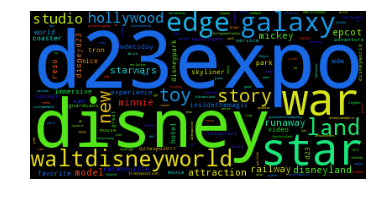

In [27]:
# Read the whole text.
text = ','.join(wordlist)
# Generate a word cloud image
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [28]:
df2 = df[df['date']>'2017-07-15  22:00:00']
df2 = df2[df2['date']<'2017-07-16  00:00:00']
positive = df2[df2['sentiment']=='positive']['date'].count()
negative = df2[df2['sentiment']=='negative']['date'].count()
round(positive*100/(positive+negative))


87.0

In [30]:
13+87

100